In [ ]:
#Import the module
import os
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(color_codes=True)

In [ ]:
#mounted the drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the excel file from my drive
df=pd.read_excel('/content/drive/MyDrive/housedata/raw_house_data.xlsx')


**Exploratory Data Analysis** or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

Loading the data into dataframe is certainly one of the most important steps in EDA,  as we can see that the value from the data set is comma-separated. So all we have to do is to just read the excel into a data frame and pandas data frame does the job for us.

In [ ]:
#Reading the first 5 rows and all the columns
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


Checking all the rows and columns in the dataframe using the shape method.

In [ ]:
#Reading the entire rows and columns
df.shape


(5000, 16)

Checking the missing values using pandas isnull method. As we can see there are maximum missing values are in HOA Column,sqrt_ft, kitchen_feature and fireplace, its better to drop the column which has got maximum number of missing values.

In [ ]:
#Identifying the null values
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


Checking the duplicates in the below code using duplicated.sum method which clearly display that there are no duplicate in the dataframe.

In [ ]:
#Identify the duplicate values
df.duplicated().sum()

0

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution.in this case, the column such as kitchen_features and floor covering are irrelevant therefore i dropped for this instance.

In [ ]:
df = df.drop(['kitchen_features', 'floor_covering'], axis=1)
df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,5.0,NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0


Checking the data types by using dtypes method, if in case data frame needsto converted from string to integers and float.

In [ ]:
#checking the data types to convert the dataset as per the business goals.
df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

<Axes: xlabel='bedrooms'>

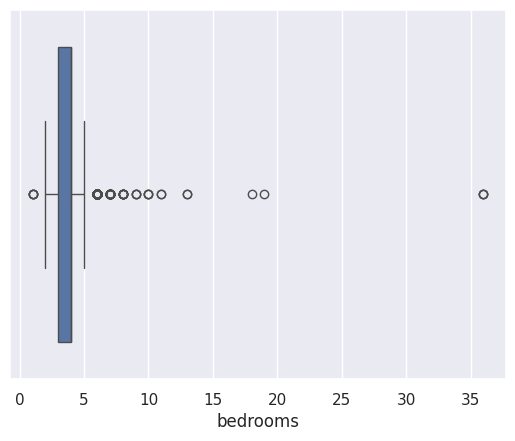

In [ ]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='bathrooms'>

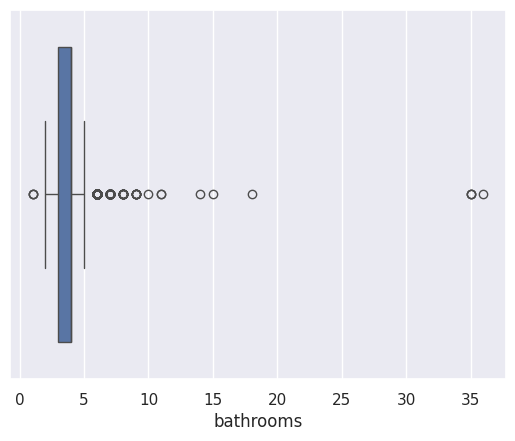

In [ ]:
sns.boxplot(x=df['bathrooms'])

<Axes: xlabel='sold_price'>

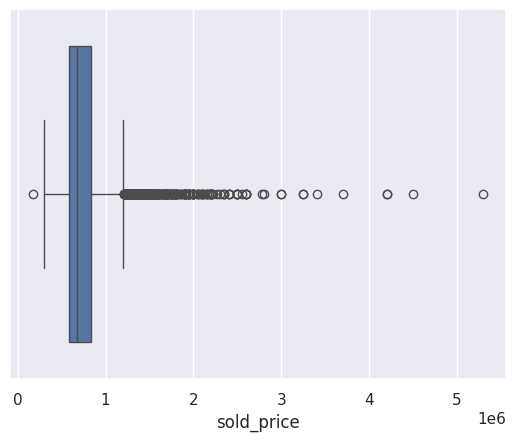

In [ ]:
sns.boxplot(x=df['sold_price'])

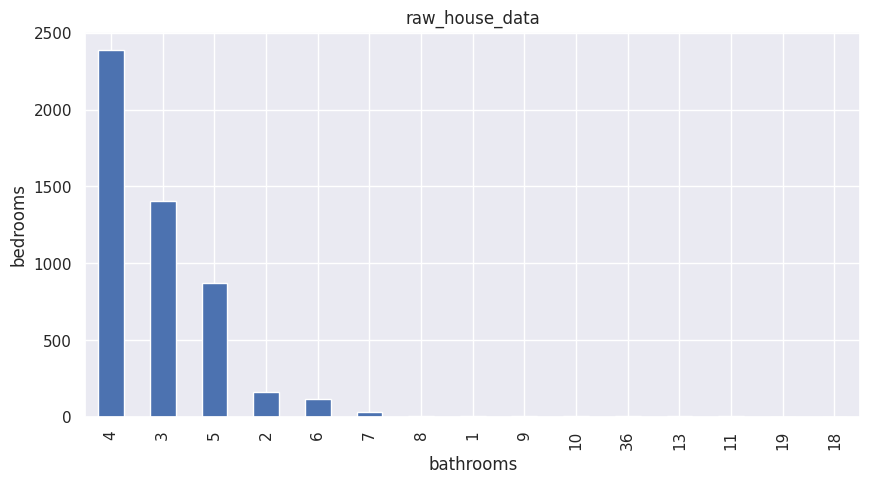

In [ ]:
df.bedrooms.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("raw_house_data")
plt.ylabel('bedrooms')
plt.xlabel('bathrooms');

Scatterplot uses dots to display the data to which represent two different numeric variables on x and y axis.Here is scatterplots are between and bedrooms and sold prices. with the plot given below we can easily draw a trend line.



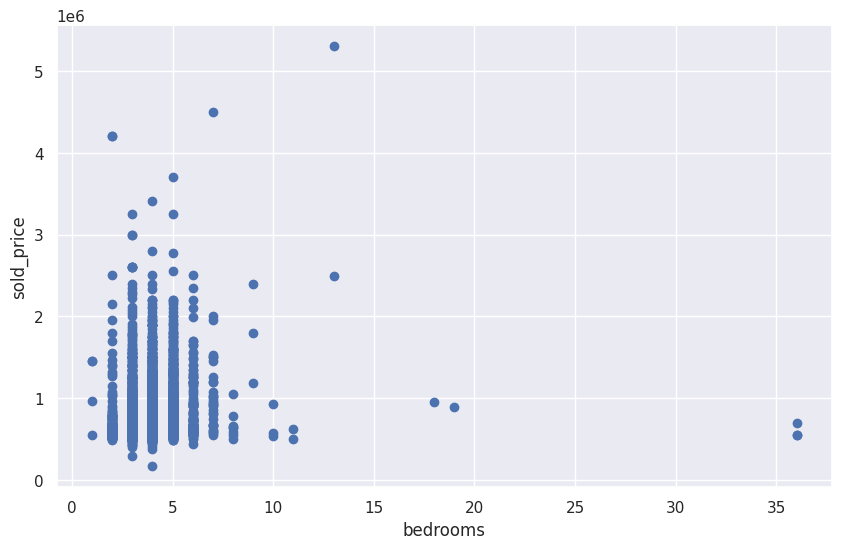

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['bedrooms'], df['sold_price'])
ax.set_xlabel('bedrooms')
ax.set_ylabel('sold_price')
plt.show()

 A correlation matrix is a table displaying correlation coefficients that measure the strength and direction of relationships between variables.The matrix shows how all the possible pairs of values in a table are related to each other. It is a powerful tool for summarizing a large data set and finding and showing patterns in the data.



,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
MLS,1.000000,0.031019,0.323165,0.118296,0.441466,-0.084742,0.003306,-0.003144,-0.012254,-0.060956,-0.086821,-0.007610,-0.062502,-0.018158
sold_price,0.031019,1.000000,-0.039925,-0.036819,0.035206,0.332357,0.023326,-0.014064,0.115932,0.326717,0.531191,0.100528,0.384388,0.171170
zipcode,0.323165,-0.039925,1.000000,0.049399,0.457102,-0.127783,-0.001265,0.037776,0.049982,-0.052878,-0.008548,0.081962,-0.017290,-0.024722
longitude,0.118296,-0.036819,0.049399,1.000000,-0.251697,0.127900,-0.000959,-0.008791,0.058279,0.015003,0.058771,-0.040699,0.046833,-0.021703
latitude,0.441466,0.035206,0.457102,-0.251697,1.000000,-0.202018,0.000823,0.080538,-0.091935,-0.080500,-0.123644,0.062435,-0.088493,0.030892
lot_acres,-0.084742,0.332357,-0.127783,0.127900,-0.202018,1.000000,-0.000571,-0.039552,0.069277,0.055080,0.121918,-0.060816,0.086382,-0.008533
taxes,0.003306,0.023326,-0.001265,-0.000959,0.000823,-0.000571,1.000000,0.000021,0.005259,0.008979,0.037630,0.005576,0.022555,0.004560
year_built,-0.003144,-0.014064,0.037776,-0.008791,0.080538,-0.039552,0.000021,1.000000,-0.086302,-0.066397,-0.046397,0.106889,-0.032150,0.015036
bedrooms,-0.012254,0.115932,0.049982,0.058279,-0.091935,0.069277,0.005259,-0.086302,1.000000,0.687336,0.590305,0.052618,0.145481,-0.067988
bathrooms,-0.060956,0.326717,-0.052878,0.015003,-0.080500,0.055080,0.008979,-0.066397,0.687336,1.000000,0.701917,0.113944,0.225672,0.005243


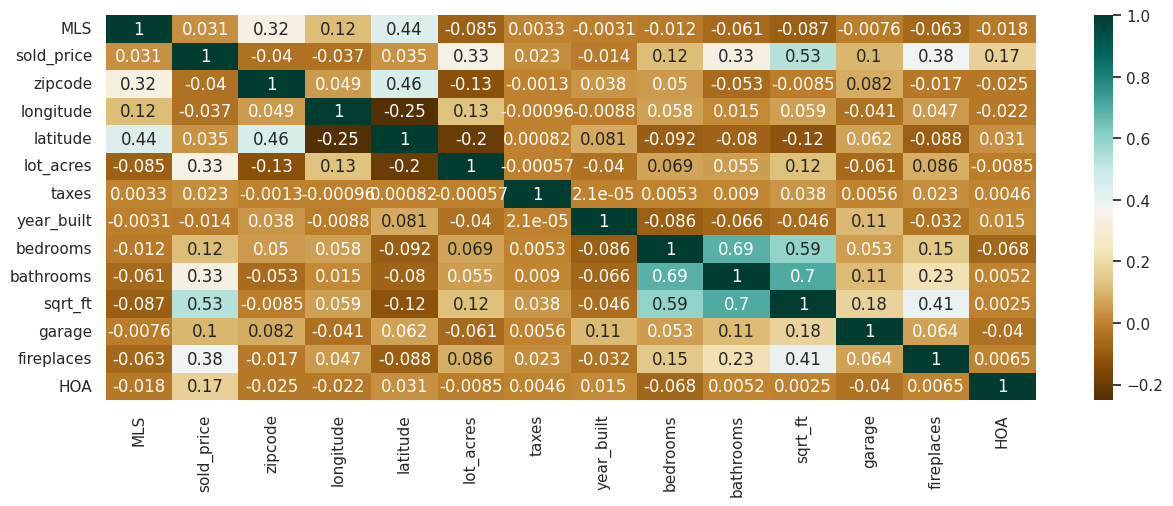

In [ ]:
plt.figure(figsize=(15,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c